# Mean Study Distance

Compute the mean similarity between studies in the same review and studies in different reviews (hopefully the mean similarity between studies in the same review is bigger)!

### Choose Experiment Group & ID

In [1]:
exp_group = 'siamese'
exp_id = 0

### Load Study Vectors

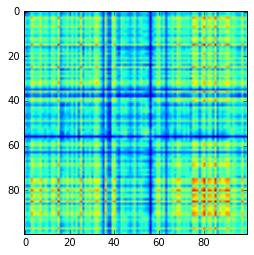

In [65]:
X = pickle.load(open('../store/study_vecs/{}/{}.p'.format(exp_group, exp_id))).astype('float64')
nb_train, nb_dim = X.shape

scores = np.dot(X, X.T)
plt.imshow(scores)

### Load Corresponding `CDNO`s

In [63]:
from trainer import Trainer

trainer = Trainer(exp_group, exp_id, hyperparam_dict={})
trainer.load_texts(inputs=['abstracts', 'outcomes'])

from sklearn.cross_validation import KFold

train_idxs, _ = next(iter(KFold(trainer.nb_train, n_folds=5, shuffle=True, random_state=1337)))
train_idxs = train_idxs[:100]

df = pd.read_csv('../../preprocess/study_inclusion.csv', index_col=0).ix[train_idxs]
cdnos = df.cdno.astype('category').cat.codes

Compute the mean similarity between pairs of studies from the same review and pairs of studies from different reviews...

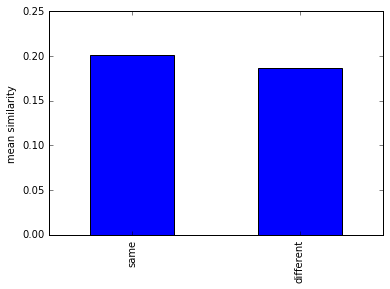

In [84]:
nb_same = nb_different = 0
same_sum = different_sum = 0

for i in range(nb_train):
    for j in range(i+1, nb_train):
        if cdnos.iloc[i] == cdnos.iloc[j]:
            same_sum += scores[i][j]
            nb_same += 1
        else:
            different_sum += scores[i][j]
            nb_different += 1
            
same_mean = same_sum / nb_same
different_mean = different_sum / nb_different

# plot means
axes = pd.Series([same_mean, different_mean]).plot(kind='bar')
axes.set_ylabel('mean similarity')
plt.xticks(range(2), ['same', 'different']);